## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
grouped_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [67]:
grouped_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Dropping duplicate rows
grouped_data = grouped_data.drop_duplicates()

In [11]:
grouped_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice in the DataFrame.
print("There are " + str(len(grouped_data["Mouse ID"].unique())) + " mice in this study.\n")
print("-----------------------------------------------------------------------------------\n")

grouped_data.info()
# Data looks clean. 

There are 249 mice in this study.

-----------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 213.1+ KB


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# I do not know what this instruction means, if I have time I'll come back to it...

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_stats = grouped_data.groupby('Drug Regimen').agg(
    tumor_mean = ('Tumor Volume (mm3)', np.mean),
    tumor_median = ('Tumor Volume (mm3)', np.median),
    tumor_variance = ('Tumor Volume (mm3)', np.var),
    tumor_sd = ('Tumor Volume (mm3)', np.std),
    tumor_SEM = ('Tumor Volume (mm3)', st.sem)
)

drug_regimen_stats


,tumor_mean,tumor_median,tumor_variance,tumor_sd,tumor_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

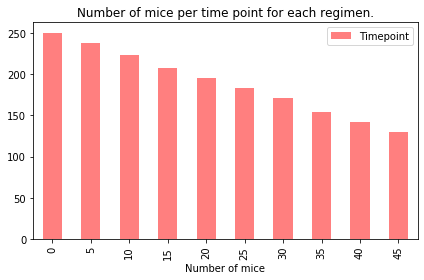

In [43]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_group = grouped_data.groupby('Timepoint')

mice_group_count = pd.DataFrame(mice_group['Timepoint'].count())

mice_per_treatment = mice_group_count.plot(kind='bar', title="Number of mice per time point for each regimen.", color="red", alpha=0.5)

mice_per_treatment.set_xlabel("Timepoint")
mice_per_treatment.set_xlabel("Number of mice")
plt.tight_layout()

plt.savefig("figures/PandaBarChart.png")

plt.show()


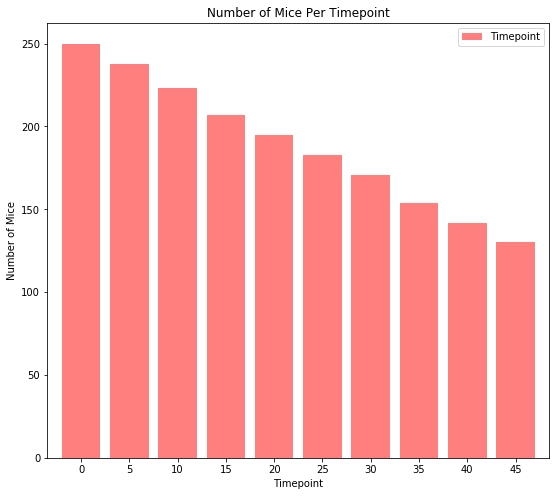

In [60]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_group_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(9,8))
plt.bar(x_axis, mice_group_count["Timepoint"], color="red", alpha=0.5, align="center")
plt.xticks(tick_locations, list(mice_group_count.index))

plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(mice_group_count["Timepoint"])*1.05)

plt.title("Number of Mice Per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")

legend = ["Timepoint"]
plt.legend(legend, loc="best")

plt.savefig("figures/PyplotBarChart.png")
plt.show()

## Pie Plots

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = grouped_data.groupby('Sex')



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
